# Data Science Basics

Welcome to the data science workshop!  

## Getting our feet wet

The first thing we want to do is import the packages that we will need. For now, this includes:
* NumPy: Stands for NUMeric PYthon. The de-facto library for handling matrices and vectors in Python and provides a wide array of mathematical functions.
* Pandas: Most common library for handling data. Think of it as a superpowered Excel.
* Seaborn: A plotting library.

In [109]:
# Import packages that we will need to use.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Let's start with something easy! Let's plot our favorite quadratic function $f: \mathbb{R} \rightarrow \mathbb{R}$ where $f(x) = x^2$.

In [56]:
X = np.linspace(-5, 5, 6)
X

array([-5., -3., -1.,  1.,  3.,  5.])

Essentially, the $\texttt{linspace}$ function generates 6 numbers equally spaced between $-5$ and $5$, including the endpoints. Now, let's apply our function $f$.

In [57]:
Y = X ** 2
Y

array([25.,  9.,  1.,  1.,  9., 25.])

Now, we have our $x$ and $y$ values, but our problem is that they are isolated. Let's put them into a table - a data structure we will now refer to as a _dataframe_.

In [60]:
df = pd.DataFrame({'x': X, 'f(x)': Y})
df

,x,f(x)
0,-5.0,25.0
1,-3.0,9.0
2,-1.0,1.0
3,1.0,1.0
4,3.0,9.0
5,5.0,25.0


This looks more like something we are used to! Or maybe, this?

In [61]:
pd.DataFrame.transpose(df)

,0,1,2,3,4,5
x,-5.0,-3.0,-1.0,1.0,3.0,5.0
f(x),25.0,9.0,1.0,1.0,9.0,25.0


Now, all we have to do is plot it!

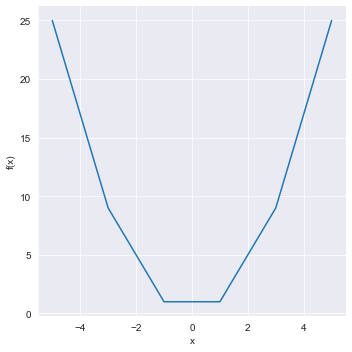

In [62]:
sns.set_style('darkgrid')
sns.relplot(x="x", y="f(x)", kind="line", data=df)

That looks _about_ right but not quite right. Let's reorganize our previous code and add more data points.

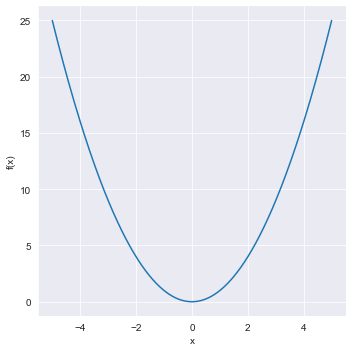

In [63]:
X = np.linspace(-5, 5, 1000)
Y = X ** 2
df = pd.DataFrame({'x': X, 'f(x)': Y})
sns.relplot(x="x", y="f(x)", kind="line", data=df)

### A Statistical Problem

What we have done so far is cool and all, but it's not really data science. Where's the data? Where's the science? Let's first construct a data science problem so that we know what we are dealing with. First, let's create some data that simulates the following equation:

$$ y = 0.81x + 0.37x^2$$

In [113]:
X = np.linspace(-5.0, 5.0, 100)
Y = X * 0.81 + (X ** 2) * 0.37
df = pd.DataFrame({'x': X, 'f(x)': Y})
df.head(5)

,x,f(x)
0,-5.00000,5.200000
1,-4.89899,4.911856
2,-4.79798,4.631262
3,-4.69697,4.358219
4,-4.59596,4.092725


Now, let's plot it and see what it looks like.

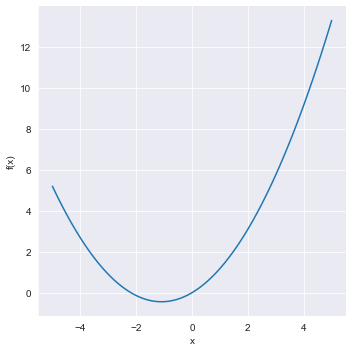

In [114]:
sns.relplot(x='x', y='f(x)', kind='line', data=df, legend='full')

In [116]:
Y2 = (X * 0.81 + (X ** 2) * 0.37) + np.random.normal(0,1,100)
Y2[:5]

array([5.72093802, 4.96770276, 3.08846751, 4.11611667, 3.84946493])

In [117]:
df_error = pd.DataFrame({'g(x)': Y2})
df_error.head(5)

,g(x)
0,5.720938
1,4.967703
2,3.088468
3,4.116117
4,3.849465


In [118]:
df = pd.concat([df, df_error], axis=1)
df.head(5)

,x,f(x),g(x)
0,-5.00000,5.200000,5.720938
1,-4.89899,4.911856,4.967703
2,-4.79798,4.631262,3.088468
3,-4.69697,4.358219,4.116117
4,-4.59596,4.092725,3.849465


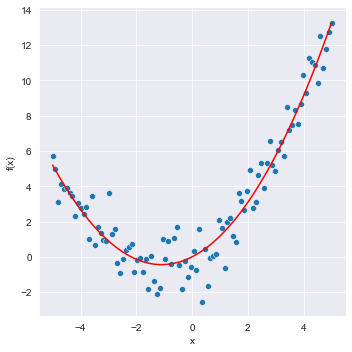

In [120]:
p = sns.relplot(x='x', y='g(x)', data=df, kind='scatter')
p.map_dataframe(sns.lineplot, 'x', 'f(x)', color='r')